In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [8]:
data = pd.DataFrame(data= {'x' : [ -2,  -1.5, -3.4, 5,   1.3, 2.2, 3, 0 ], 
                           'y' : [-3.3, -2.1,   -5., 5.6,  2, 2.8, 4.1, 1 ]})

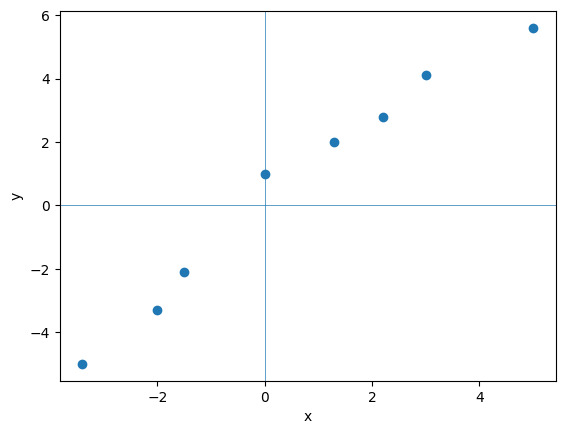

In [11]:
plt.scatter(x = data['x'], y = data['y'])
plt.axhline(0, linewidth = 0.5)
plt.axvline(0, linewidth = 0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [12]:
import numpy as np 
np.linspace(0, 3, 100)

array([0.        , 0.03030303, 0.06060606, 0.09090909, 0.12121212,
       0.15151515, 0.18181818, 0.21212121, 0.24242424, 0.27272727,
       0.3030303 , 0.33333333, 0.36363636, 0.39393939, 0.42424242,
       0.45454545, 0.48484848, 0.51515152, 0.54545455, 0.57575758,
       0.60606061, 0.63636364, 0.66666667, 0.6969697 , 0.72727273,
       0.75757576, 0.78787879, 0.81818182, 0.84848485, 0.87878788,
       0.90909091, 0.93939394, 0.96969697, 1.        , 1.03030303,
       1.06060606, 1.09090909, 1.12121212, 1.15151515, 1.18181818,
       1.21212121, 1.24242424, 1.27272727, 1.3030303 , 1.33333333,
       1.36363636, 1.39393939, 1.42424242, 1.45454545, 1.48484848,
       1.51515152, 1.54545455, 1.57575758, 1.60606061, 1.63636364,
       1.66666667, 1.6969697 , 1.72727273, 1.75757576, 1.78787879,
       1.81818182, 1.84848485, 1.87878788, 1.90909091, 1.93939394,
       1.96969697, 2.        , 2.03030303, 2.06060606, 2.09090909,
       2.12121212, 2.15151515, 2.18181818, 2.21212121, 2.24242

In [13]:
#MSE
import numpy as np 
x = data.x
y = data.y

loss_val = [np.mean ((a * x-y) ** 2) for a in np.linspace(0, 3, 100)] 

In [14]:
loss_val

[np.float64(12.66375),
 np.float64(12.096128328741965),
 np.float64(11.541899678604224),
 np.float64(11.001064049586777),
 np.float64(10.473621441689623),
 np.float64(9.959571854912763),
 np.float64(9.458915289256197),
 np.float64(8.971651744719926),
 np.float64(8.497781221303947),
 np.float64(8.037303719008264),
 np.float64(7.590219237832872),
 np.float64(7.156527777777776),
 np.float64(6.736229338842975),
 np.float64(6.3293239210284655),
 np.float64(5.93581152433425),
 np.float64(5.555692148760329),
 np.float64(5.188965794306702),
 np.float64(4.83563246097337),
 np.float64(4.49569214876033),
 np.float64(4.169144857667584),
 np.float64(3.8559905876951324),
 np.float64(3.556229338842975),
 np.float64(3.2698611111111098),
 np.float64(2.99688590449954),
 np.float64(2.737303719008264),
 np.float64(2.4911145546372815),
 np.float64(2.2583184113865933),
 np.float64(2.038915289256198),
 np.float64(1.8329051882460972),
 np.float64(1.64028810835629),
 np.float64(1.461064049586776),
 np.float64(

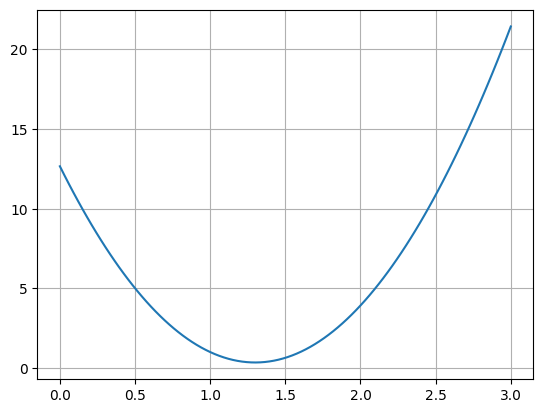

In [18]:
plt.plot(np.linspace(0,3,100), loss_val)
plt.grid(True)
plt.show()

In [27]:
import torch

x_tensor = torch.tensor(x, dtype = torch.float32)
y_tensor = torch.tensor(y, dtype = torch.float32)

In [28]:
#미분 적용 
a_tensor = torch.tensor(2.5, requires_grad = True)

In [29]:
for idx in range(10):
    #예측값을 실제값에서 뺀 후 제곱 = MEAN SQUARED 
    loss = torch.mean((a_tensor * x_tensor - y_tensor) ** 2) 
    #역전파
    loss.backward() 
    print(f"a value : {a_tensor.item()}, dl/da : {a_tensor.grad}")

    with torch.no_grad():
        a_tensor -= 0.1 * a_tensor.grad
    a_tensor.grad.zero_()

a value : 2.5, dl/da : 17.510000228881836
a value : 0.7489999532699585, dl/da : -8.028335571289062
a value : 1.5518335103988647, dl/da : 3.680992603302002
a value : 1.1837341785430908, dl/da : -1.687736988067627
a value : 1.3525078296661377, dl/da : 0.7738271951675415
a value : 1.2751251459121704, dl/da : -0.3547992408275604
a value : 1.3106050491333008, dl/da : 0.16267478466033936
a value : 1.294337511062622, dl/da : -0.07458730041980743
a value : 1.3017961978912354, dl/da : 0.03419780731201172
a value : 1.298376441001892, dl/da : -0.015679091215133667


### 자동차 연비 예측 

In [111]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch13/figures/13_07.png', width=700)

In [64]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']


df = pd.read_csv(url, names=column_names,
                 na_values = "?", comment='\t',
                 sep=" ", skipinitialspace=True)


df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [65]:
df.Origin.unique()

array([1, 3, 2])

In [66]:
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [67]:
df.dropna(inplace=True)

In [68]:
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [69]:
df.reset_index(drop=True)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,1
388,44.0,4,97.0,52.0,2130.0,24.6,82,2
389,32.0,4,135.0,84.0,2295.0,11.6,82,1
390,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [70]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [71]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
MPG,313.0,23.404153,7.666909,9.0,17.5,23.0,29.0,46.6
Cylinders,313.0,5.402556,1.701506,3.0,4.0,4.0,8.0,8.0
Displacement,313.0,189.512780,102.675646,68.0,104.0,140.0,260.0,455.0
Horsepower,313.0,102.929712,37.919046,46.0,75.0,92.0,120.0,230.0
Weight,313.0,2961.198083,848.602146,1613.0,2219.0,2755.0,3574.0,5140.0
Acceleration,313.0,15.704473,2.725399,8.5,14.0,15.5,17.3,24.8
Model Year,313.0,75.929712,3.675305,70.0,73.0,76.0,79.0,82.0
Origin,313.0,1.591054,0.807923,1.0,1.0,1.0,2.0,3.0


In [72]:
train_stats = df_train.describe().T

In [73]:
train_stats.reset_index().rename(columns={'index' : 'column'})

,column,count,mean,std,min,25%,50%,75%,max
0,MPG,313.0,23.404153,7.666909,9.0,17.5,23.0,29.0,46.6
1,Cylinders,313.0,5.402556,1.701506,3.0,4.0,4.0,8.0,8.0
2,Displacement,313.0,189.512780,102.675646,68.0,104.0,140.0,260.0,455.0
3,Horsepower,313.0,102.929712,37.919046,46.0,75.0,92.0,120.0,230.0
4,Weight,313.0,2961.198083,848.602146,1613.0,2219.0,2755.0,3574.0,5140.0
5,Acceleration,313.0,15.704473,2.725399,8.5,14.0,15.5,17.3,24.8
6,Model Year,313.0,75.929712,3.675305,70.0,73.0,76.0,79.0,82.0
7,Origin,313.0,1.591054,0.807923,1.0,1.0,1.0,2.0,3.0


In [74]:
#원본 보존 
df_train_norm, df_test_norm = df_train.copy(), df_test.copy()

In [75]:
numb_col_name = ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration']

import warnings
warnings.filterwarnings('ignore') 
#정규화 수행 
for col_name in numb_col_name:
    mean = train_stats.loc[col_name, 'mean']
    std  = train_stats.loc[col_name, 'std']
    df_train_norm.loc[:, col_name] = (df_train_norm.loc[: ,col_name] - mean) / std 
    df_test_norm.loc[:, col_name] = (df_test_norm.loc[: ,col_name] - mean) / std 

In [76]:
df_train_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
MPG,313.0,2.340415e+01,7.666909,9.000000,17.500000,23.000000,29.000000,46.600000
Cylinders,313.0,-7.377840e-17,1.000000,-1.412018,-0.824303,-0.824303,1.526556,1.526556
Displacement,313.0,1.248558e-16,1.000000,-1.183463,-0.832844,-0.482225,0.686504,2.585688
Horsepower,313.0,2.553868e-17,1.000000,-1.501349,-0.736562,-0.288238,0.450177,3.351094
Weight,313.0,-9.364181e-17,1.000000,-1.588728,-0.874613,-0.242986,0.722131,2.567519
Acceleration,313.0,-3.291652e-16,1.000000,-2.643456,-0.625403,-0.075025,0.585429,3.337319
Model Year,313.0,7.592971e+01,3.675305,70.000000,73.000000,76.000000,79.000000,82.000000
Origin,313.0,1.591054e+00,0.807923,1.000000,1.000000,1.000000,2.000000,3.000000


In [78]:
#버킷
boundaries = torch.tensor([73, 76, 79])

In [81]:
v = torch.tensor(df_train_norm['Model Year'].values)

In [82]:
v

tensor([81, 78, 74, 80, 81, 73, 81, 80, 79, 74, 76, 72, 81, 77, 70, 73, 79, 72,
        78, 78, 79, 73, 76, 73, 77, 73, 78, 81, 78, 71, 75, 79, 81, 81, 72, 70,
        79, 75, 73, 80, 82, 82, 71, 78, 79, 73, 72, 81, 76, 75, 81, 82, 79, 73,
        74, 74, 77, 70, 78, 73, 74, 73, 71, 73, 70, 75, 70, 75, 70, 73, 75, 76,
        72, 71, 75, 81, 82, 82, 74, 71, 77, 77, 76, 76, 82, 79, 78, 74, 80, 73,
        71, 73, 77, 74, 82, 75, 70, 78, 75, 78, 71, 80, 77, 77, 73, 81, 75, 72,
        82, 73, 70, 82, 73, 81, 80, 80, 70, 71, 71, 78, 71, 78, 71, 80, 82, 71,
        78, 71, 81, 72, 75, 74, 71, 77, 72, 78, 80, 78, 82, 82, 82, 71, 76, 75,
        78, 71, 73, 75, 77, 79, 71, 70, 73, 75, 72, 71, 76, 78, 74, 70, 82, 76,
        76, 76, 74, 79, 73, 76, 81, 74, 82, 81, 76, 78, 81, 77, 80, 77, 72, 80,
        80, 79, 76, 73, 73, 73, 79, 75, 81, 71, 75, 76, 76, 76, 80, 73, 77, 74,
        79, 72, 73, 76, 74, 74, 76, 75, 80, 70, 78, 73, 76, 77, 72, 79, 71, 81,
        70, 81, 72, 76, 72, 78, 82, 74, 

In [83]:
torch.bucketize(v, boundaries, right=True)

tensor([3, 2, 1, 3, 3, 1, 3, 3, 3, 1, 2, 0, 3, 2, 0, 1, 3, 0, 2, 2, 3, 1, 2, 1,
        2, 1, 2, 3, 2, 0, 1, 3, 3, 3, 0, 0, 3, 1, 1, 3, 3, 3, 0, 2, 3, 1, 0, 3,
        2, 1, 3, 3, 3, 1, 1, 1, 2, 0, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 2,
        0, 0, 1, 3, 3, 3, 1, 0, 2, 2, 2, 2, 3, 3, 2, 1, 3, 1, 0, 1, 2, 1, 3, 1,
        0, 2, 1, 2, 0, 3, 2, 2, 1, 3, 1, 0, 3, 1, 0, 3, 1, 3, 3, 3, 0, 0, 0, 2,
        0, 2, 0, 3, 3, 0, 2, 0, 3, 0, 1, 1, 0, 2, 0, 2, 3, 2, 3, 3, 3, 0, 2, 1,
        2, 0, 1, 1, 2, 3, 0, 0, 1, 1, 0, 0, 2, 2, 1, 0, 3, 2, 2, 2, 1, 3, 1, 2,
        3, 1, 3, 3, 2, 2, 3, 2, 3, 2, 0, 3, 3, 3, 2, 1, 1, 1, 3, 1, 3, 0, 1, 2,
        2, 2, 3, 1, 2, 1, 3, 0, 1, 2, 1, 1, 2, 1, 3, 0, 2, 1, 2, 2, 0, 3, 0, 3,
        0, 3, 0, 2, 0, 2, 3, 1, 3, 0, 0, 2, 2, 2, 2, 1, 3, 3, 2, 0, 2, 3, 1, 2,
        1, 3, 2, 3, 1, 1, 0, 3, 1, 3, 1, 2, 2, 3, 1, 1, 3, 2, 0, 2, 0, 0, 3, 1,
        3, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 1, 1, 3, 2, 2, 2, 3, 0, 3, 0, 3, 3, 0,
        1, 1, 3, 2, 2, 0, 0, 1, 2, 3, 2,

In [84]:
df_train_norm['Model Year Bucketed'] = torch.bucketize(v, boundaries, right=True)

In [102]:
df_test_norm['Model Year Bucketed'] = torch.bucketize(torch.tensor(df_test_norm['Model Year'].values)
    , boundaries, right=True)

In [86]:
numb_col_name.append('Model Year Bucketed')

In [88]:
from torch.nn.functional import one_hot
#크기가 의미 없으므로 원핫 인코딩 활용
one_hot(torch.from_numpy(df_train_norm['Origin'].values) % df_train_norm.Origin.unique().size)

tensor([[0, 1, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 0, 1],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 

In [89]:
origin_encodered = one_hot(torch.from_numpy(df_train_norm['Origin'].values) % df_train_norm.Origin.unique().size)

In [90]:
df_train_norm['Origin'].values[:5]

array([1, 1, 2, 3, 2])

In [99]:
x_train = torch.cat([
    torch.tensor(df_train_norm[numb_col_name].values),
    origin_encodered], 1)

In [103]:
x_test = torch.cat([
    torch.tensor(df_test_norm[numb_col_name].values),
    one_hot(torch.from_numpy(df_test_norm['Origin'].values) % 3)], 1)

In [104]:
x_test.shape

torch.Size([79, 9])

In [105]:
x_train.shape

torch.Size([313, 9])

In [107]:
torch.tensor(df_train_norm.MPG.values).float()

tensor([27.2000, 18.6000, 29.0000, 37.2000, 33.0000, 13.0000, 22.4000, 44.6000,
        27.4000, 31.0000, 24.0000, 28.0000, 17.6000, 15.0000, 11.0000, 12.0000,
        26.8000, 13.0000, 21.6000, 20.8000, 16.9000, 20.0000, 26.5000, 18.0000,
        26.0000, 24.0000, 29.5000, 20.2000, 32.8000, 14.0000, 16.0000, 31.8000,
        30.7000, 34.1000, 20.0000, 15.0000, 28.4000, 20.0000, 13.0000, 35.0000,
        31.0000, 44.0000, 27.0000, 17.0000, 34.1000, 14.0000, 23.0000, 28.1000,
        14.5000, 24.0000, 29.9000, 36.0000, 23.9000, 15.0000, 16.0000, 20.0000,
        16.0000, 24.0000, 23.9000, 11.0000, 14.0000, 19.0000, 30.0000, 21.0000,
        15.0000, 23.0000, 18.0000, 29.0000, 18.0000, 12.0000, 33.0000, 29.5000,
        19.0000, 14.0000, 19.0000, 26.6000, 36.0000, 38.0000, 24.0000, 13.0000,
        16.0000, 17.5000, 19.0000, 16.0000, 27.0000, 16.5000, 20.3000, 24.0000,
        30.0000, 23.0000, 17.0000, 18.0000, 25.5000, 13.0000, 24.0000, 16.0000,
        26.0000, 19.4000, 17.0000, 30.90

In [108]:
y_train = torch.tensor(df_train_norm.MPG.values).float()
y_test = torch.tensor(df_test_norm.MPG.values).float()

In [119]:
import torch.nn as nn

class mpg(nn.Module):
    def __init__(self):
        super().__init__()

        self.seq_layer = nn.Sequential(
                nn.Linear(9, 6),
                nn.ReLU(),
                nn.Linear(6, 3),
                nn.ReLU(),
                nn.Linear(3, 1)
         )

        #self.fc1 = nn.Linear(9, 6)
        #self.fc2 = nn.Linear(6, 3) 
        #self.fc3 = nn.Linear(3, 1)
        #self.activate = torch.functional.F.relu()

    def forward(self, x):
        return self.seq_layer(x)
    

In [120]:

train_df = TensorDataset(x_train, y_train)

batch_size = 8 
torch.manual_seed(1)
train_dl = DataLoader(train_df, batch_size, shuffle=True)

In [121]:
model = mpg()
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [122]:
torch.manual_seed(1)
num_epochs = 200
log_epochs = 20
for epoch in range(num_epochs):
    loss_hist_train = 0
    for x_batch, y_batch in train_dl:
        pred = model(x_batch.to(torch.float32))[:, 0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist_train += loss.item()
    if epoch % log_epochs==0:
        print(f'에포크 {epoch}  손실 {loss_hist_train/len(train_dl):.4f}')

에포크 0  손실 562.2646
에포크 20  손실 8.7118
에포크 40  손실 8.3476
에포크 60  손실 7.7089
에포크 80  손실 7.6267
에포크 100  손실 7.7415
에포크 120  손실 7.8928
에포크 140  손실 8.7642
에포크 160  손실 8.2205
에포크 180  손실 7.9165


### BasicBlock

In [124]:
#모델구조정의
class BasicBlock(nn.Module):
    def __init__(self, in_planes, planes, stride = 1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size = 3, stride = stride, padding = 1, bias = False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.bn2 = nn.BatchNorm2d(planes)
       
        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, planes, kernel_size = 1, stride = stride, bias = False),
                nn.BatchNorm2d(planes))
   
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

In [127]:
# CIFAR-10 / 모델 객체 생성 
class ResNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 16

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16,
                            kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(16)
        self.layer1 = self._make_layer(16, 2, stride=1)
        self.layer2 = self._make_layer(32, 2, stride=2)
        self.layer3 = self._make_layer(64, 2, stride=2)
        self.liner  = nn.Linear(64, num_classes)

    def _make_layer(self, planes, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(BasicBlock(self.in_planes, planes, stride))
            self.in_planes = planes
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = F.avg_pool2d(out, 8)
        out = self.linear(out.view(out.size(0), -1))
        return out

In [130]:
model = ResNet()

In [131]:
model

ResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=

In [132]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

In [134]:
from torchvision import transforms, datasets

BATCH_SIZE = 32
EPOCHS = 10
train_dataset = datasets.CIFAR10(root = "./data/CIFAR_10",
                                  train = True,
                                  download = True,
                                  transform = transforms.Compose([
                                    transforms.RandomHorizontalFlip(),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))

test_dataset = datasets.CIFAR10(root = "./data/CIFAR_10",
                                train = False,
                                transform = transforms.Compose([
                                    transforms.RandomHorizontalFlip(),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                            batch_size = BATCH_SIZE,
                                            shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = False)

Files already downloaded and verified


In [135]:
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([32, 3, 32, 32]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9764706..0.52156866].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9607843..0.81960785].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5058824..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9372549..0.58431375].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5372549..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9529412..1.0].
Clipping inp

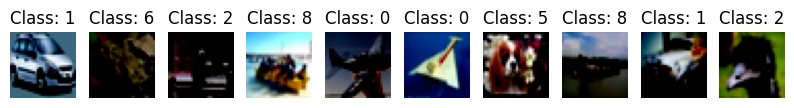

In [143]:
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(np.transpose(X_train[i], (1, 2, 0)))
    plt.title('Class: ' + str(y_train[i].item()))

In [144]:
def train(model, train_loader, optimizer, log_interval):
    model.train()
    for batch_idx, (image, label) in enumerate(train_loader):
        image = image
        label = label
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tTrain Loss: {:.6f}".format(
                epoch, batch_idx * len(image), 
                len(train_loader.dataset), 100. * batch_idx / len(train_loader), 
                loss.item()))

In [145]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for image, label in test_loader:
            image = image
            label = label
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim = True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()
    
    test_loss /= (len(test_loader.dataset) / BATCH_SIZE)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [146]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

NameError: name 'F' is not defined